In [1]:
from sklearn.cluster import KMeans

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import cv2

In [5]:
from collections import Counter

In [6]:
from skimage.color import rgb2lab, deltaE_cie76

In [7]:
import os

In [8]:
%matplotlib inline

In [9]:
image = cv2.imread(r"C:\Users\The Laptop Store\Desktop\brownskin.jpg")

In [10]:
print("The type of this input is {}".format(type(image)))

The type of this input is <class 'numpy.ndarray'>


In [11]:
print("Shape: {}".format(image.shape))

Shape: (1000, 1000, 3)


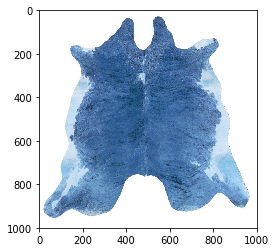

In [12]:
plt.imshow(image)

In [13]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

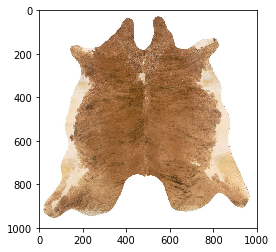

In [14]:
plt.imshow(image)

In [15]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

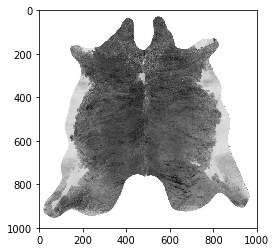

In [16]:
plt.imshow(gray_image, cmap='gray')

In [17]:
image.shape

(1000, 1000, 3)

In [18]:
resized_img = cv2.resize(image,(3000,4000))

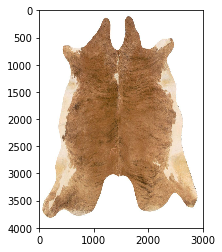

In [19]:
plt.imshow(resized_img)

In [20]:
def RGB2HEX(color):
        return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))


In [21]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [22]:
def get_colors(image, number_of_colors, show_chart):
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i]/255 for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]*255) for i in counts.keys()]
    rgb_colors = [ordered_colors[i]*255 for i in counts.keys()]
    
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = ordered_colors)
        
    return rgb_colors
    

[array([254.81410919, 254.85166355, 254.68712462]),
 array([154.50409657, 103.21280315,  61.18511033]),
 array([230.85759036, 205.55662651, 171.85060241]),
 array([199.80686461, 154.91895941, 111.00122582]),
 array([146.70897239,  95.76143916,  52.3944274 ]),
 array([168.73727667, 119.3753292 ,  78.86055947]),
 array([225.08094541, 193.47249529, 149.29972809]),
 array([242.35742308, 226.36836671, 208.83460665]),
 array([178.19927928, 129.85558559,  88.40873874]),
 array([161.61073116, 110.75123714,  69.582263  ]),
 array([208.4166873 , 172.02871998, 131.46026244]),
 array([239.6974277 , 219.32219154, 193.10042145]),
 array([189.21220599, 141.6247021 ,  98.44171588]),
 array([135.72789185,  87.57653995,  43.55986989]),
 array([118.91437156,  76.04456685,  32.43640461])]

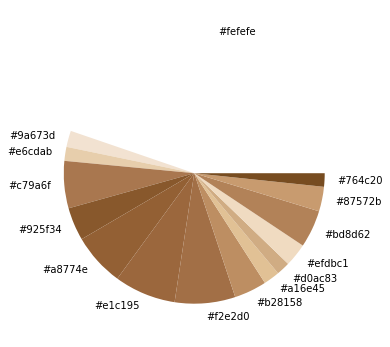

In [23]:
get_colors(get_image(r"C:\Users\The Laptop Store\Desktop\brownskin.jpg"), 15, True)